<a href="https://colab.research.google.com/github/proditorIF/Quanta/blob/main/Final_Proy/Final_project_SunSpots_McLearn_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>>>>![Error](https://drive.google.com/uc?id=1vX1LTAIaedSM-PDVWy17AaMgnXGZXGCj)


###**Materia: Temas Selectos de Física (Machine Learning)**
###**Títular:Alma Xochitl Gonzalez Morales**
###**Proyecto Final :Sunspots (Application of CNN-RNN)**
###**Autor: Barush Michelle Rueda Muñoz**
###**NUA:601310**





---

###**Tabla de contenidos**
1- [ Intoducción](#intro)\
2- [Desarrollo](#Des)
>2.1 [Manchas Solares](#SunS)\
>2.2 [Ciclo Solar de Schwabe](#Csol)\
>2.3 [Previsión Espacial](#PrevE)\
>2.4 [Redes nueronales convolucionales (CNN)](#CNN)\
>2.5 [Redes nuronales recurrentes (RNN)](#RNN)\
>2.6 [Capa Long Short-Term Memory (LSTM)](#LSTM)

3- [Código](#Cod)
>3.1 [Importación de librerias](#lib)\
>3.2 [Análisis exploratorio de datos](#lib)\
>3.3[Preprocesamiento de Datos](#ProsD)\
>3.4[Diseño del modelo](#DModel)\
>3.5[Entrenamiento del modelo](#EntD)\
>3.6[Validacíon y ajuste](#ValAj)\
>3.7[Predicciones y Visualización](#PredV)

4- [Análisis y conclusiones ](#Conclu)\
5- [Referencias](#Ref)








##**Introdución** <a name="intro"></a>
El avance tecnológico ha permitido la mejora de los sistemas de adquisición  de datos lo cual sin duda es un avance positivo pero también trajo consigo una problemática ya que  la cantidad de datos y observaciones por analizar aumento de forma considerable, para tratar esta gran cantidad de datos se ha empleado el aprendizaje automático (Machine Learning)  que engloba un  conjunto de herramientas matemáticas y estadísticas diseñadas para extraer características y patrones de los datos, estas características se pueden utilizar para facilitar la interpretación física de ciertas observaciones  gracias esto  los investigadores han podido desarrollar modelos y simulaciones más precisos del universo, lo que ha llevado a importantes descubrimientos y avances en el campo.\
Estas herramientas son útiles y aplicables en varias ramas de la física pero en particular los algoritmos de inteligencia artificial son ideales para el tipo y la cantidad de datos que se utilizan en el estudio del cosmos  es por ello que la aplicación de ML en astronomía ha demostrado ser particularmente valiosa. Estas técnicas son aplicables en múltiples paradigmas de la astronomía y cosmología y han permitido la identificación de patrones complejos, la clasificación eficiente de objetos celestes y la predicción de eventos astronómicos con una precisión sin precedentes. Por ejemplo los  algoritmos de ML  son ampliamente utilizados en la búsqueda y detección de exoplanetas. Se usan métodos de aprendizaje automático que han sido entrenados con exoplanetas ya confirmados para encontrar nuevos candidatos. Este tipo de algoritmos pueden detectar patrones en las curvas de luz de las estrellas que indiquen que puede existir uno o varios exoplanetas alrededor. \
Otra área de la astrofísica en la que se  están aplicando técnicas de aprendizaje automático  es en el procesamiento e interpretación de datos del Instrumento Espectroscópico de Energía Oscura (DESI). DESI es un experimento que ya está en funcionamiento y que realizó sus primeras pruebas durante el 2020. Este instrumento tomará espectros de al menos 30 millones de galaxias y cuásares desde el año 2021 hasta el 2025. Su objetivo principal es construir el mapa 3D más detallado del Universo para inferir la historia de expansión del Universo. \
Como se puede apreciar las problemáticas en las que se puede aplicar el ML en la cosmología son variadas, incluso ya en el proyecto parcial se desarrolló un análisis empleando el algoritmo de Metropolis-Hastings para estimar los parámetros del modelo cosmológico de expansión del universo ($\Lambda CBM$) se puede encontrar más información en el siguiente enlace ([Proyecto Pracial](https://colab.research.google.com/drive/17RpB_vZ25yNOPs4vjAcCMEnHvoT2_i9K?hl=es)).\
Para este proyecto final se busca seguir explorando las aplicaciones del  ML en la cosmología por lo que se ha seleccionado como fenómeno de estudio  a las manchas solares que son fenómenos temporales en la fotosfera del Sol que aparecen como manchas más oscuras que las áreas circundantes. Son regiones de temperatura superficial reducida causada por concentraciones de flujo de campo magnético que inhiben la convección y desempeñan un papel crucial en la variabilidad de la radiación solar y, por ende, pueden influir en el clima terrestre.\
En este proyecto, nos sumergiremos en el análisis de datos relacionados con el número de manchas solares, explorando cómo las técnicas de ML pueden revelar patrones temporales para finalmente generar predicciones que nos permitan tener al menos un idea del comportamiento futuro de los fenómenos solares ya que la actividad solar, incluidas las erupciones solares y las eyecciones de masa coronal  asociadas a las manchas solares, pueden afectar al clima espacial en la Tierra. Las perturbaciones geomagnéticas causadas por estas actividades pueden tener impactos en las comunicaciones, las redes eléctricas y los sistemas de navegación.


****

##**Desarrollo** <a name="Des"></a>


###**Manchas Solares** <a name="SunS"></a>

###**Ciclo Solar de Schwabe** <a name="Csol"></a>

###**Previsión Espacial** <a name="PrevE"></a>

###**Redes nuronales convolucionales (CNN)** <a name="CNN"></a>

###**Redes nuronales recurrentes (RNN)** <a name="RNN"></a>

###**Capa Long Short-Term Memory (LSTM)** <a name="LSTM"></a>

---

##**Código** <a name="Code"></a>

###**Importación de librerias** <a name="lib"></a>

In [ ]:
# Se importan las librerias empleadas
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.utils import plot_model

###**Análisis exploratorio de datos (EDA)**<a name="EDA"></a>

*   Elemento de lista
*   Elemento de lista



In [ ]:
# Montamos nuestro Google Drive dónde se encutra el dataset
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learn/Final_proy/Sunspots.csv')
data=data.set_index("Date")
data.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


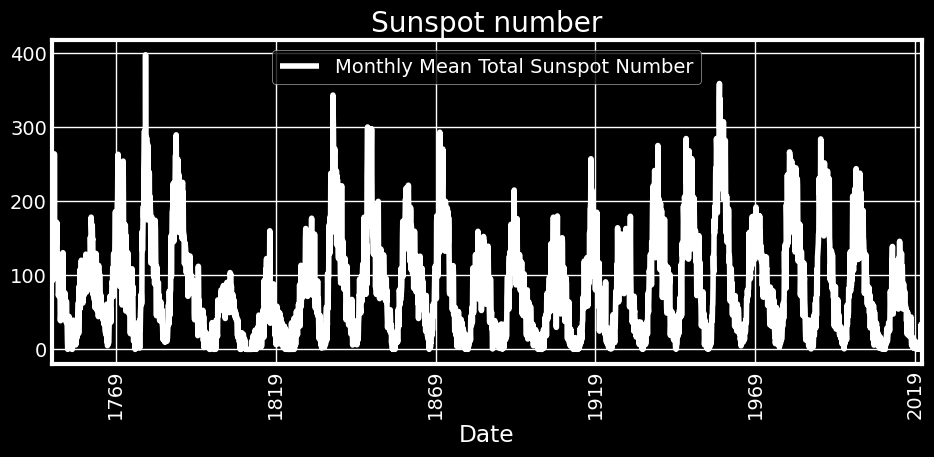

In [ ]:
data["Monthly Mean Total Sunspot Number"].plot(figsize=(10,4),legend=True, color='white')
plt.style.use('dark_background')
plt.xticks(rotation=90)
plt.xlim([data.index.min(), data.index.max()])
plt.title('Sunspot number')
plt.show()

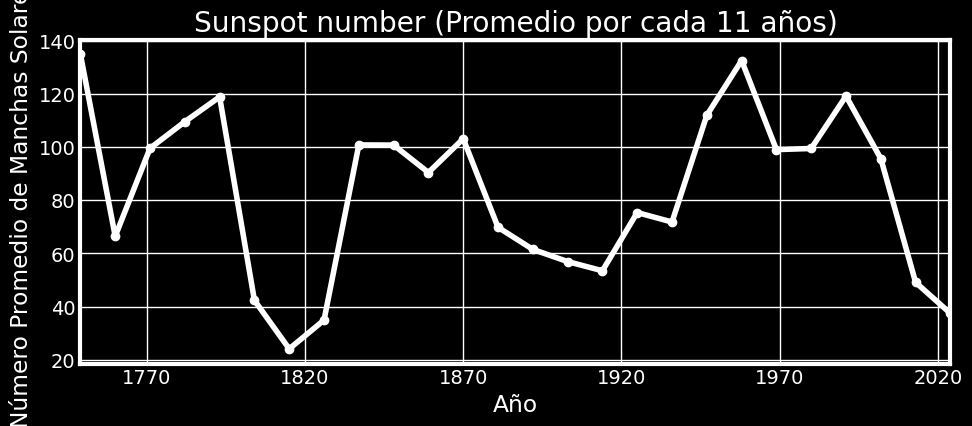

In [ ]:
# Agregación de datos por ciclos de 11 años
data_resampled = data["Monthly Mean Total Sunspot Number"].resample('11A').mean()

# Visualización
data_resampled.plot(figsize=(10, 4), marker='o', color='white')
plt.title('Sunspot number (Promedio por cada 11 años)')
plt.xlabel('Año')
plt.ylabel('Número Promedio de Manchas Solares')
plt.show()

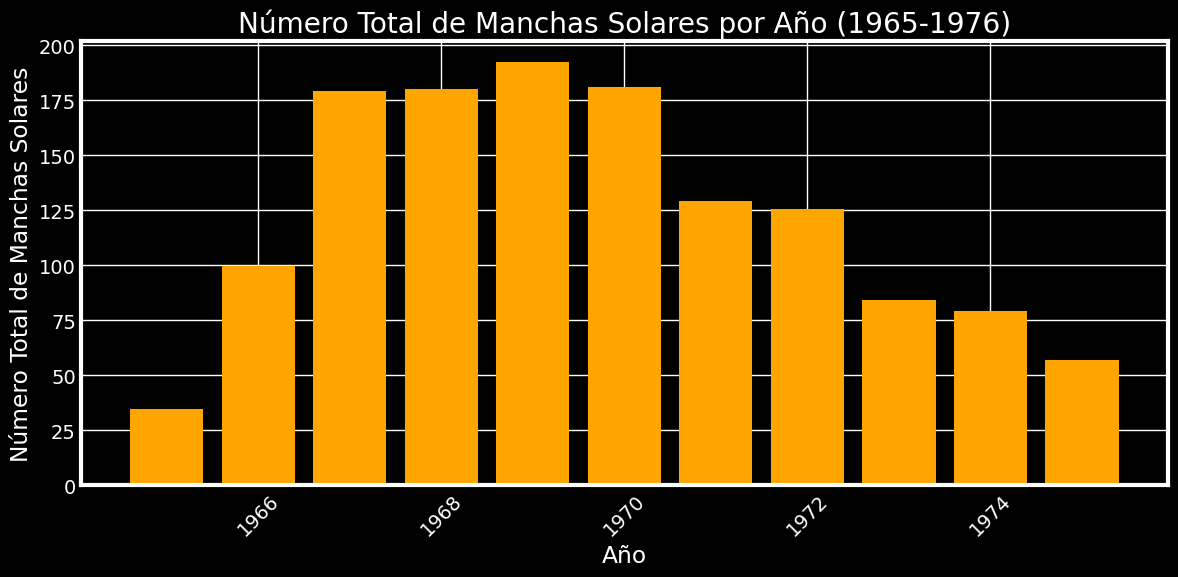

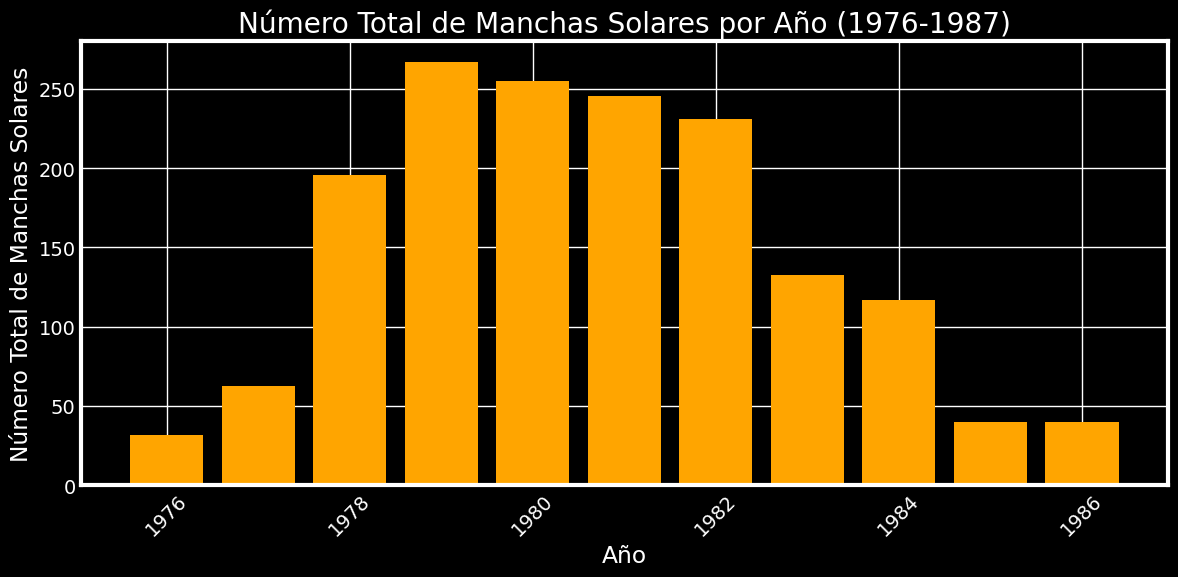

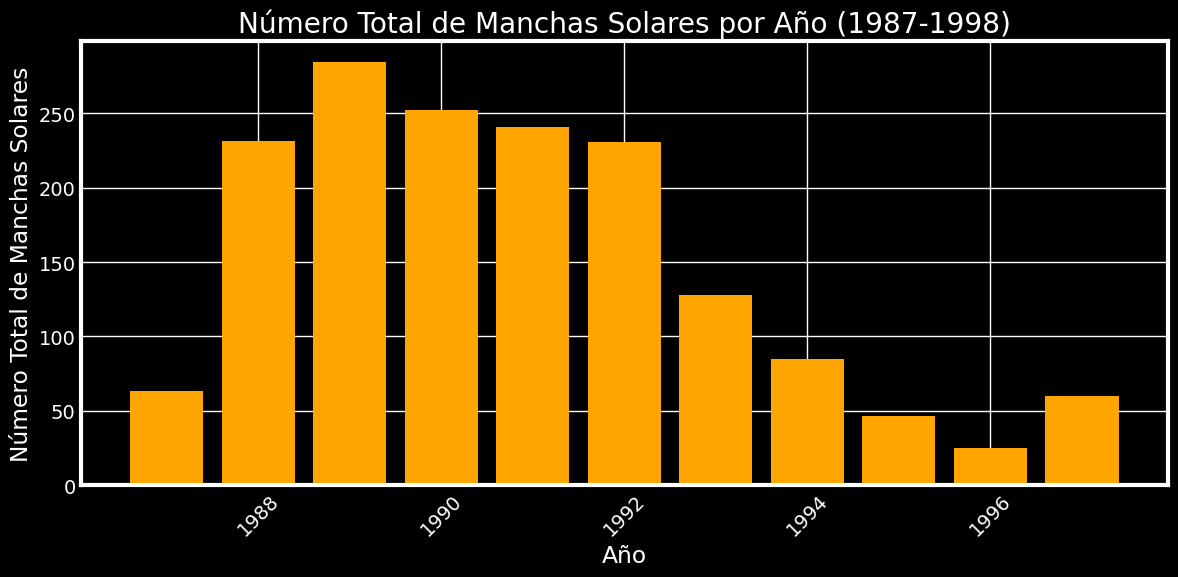

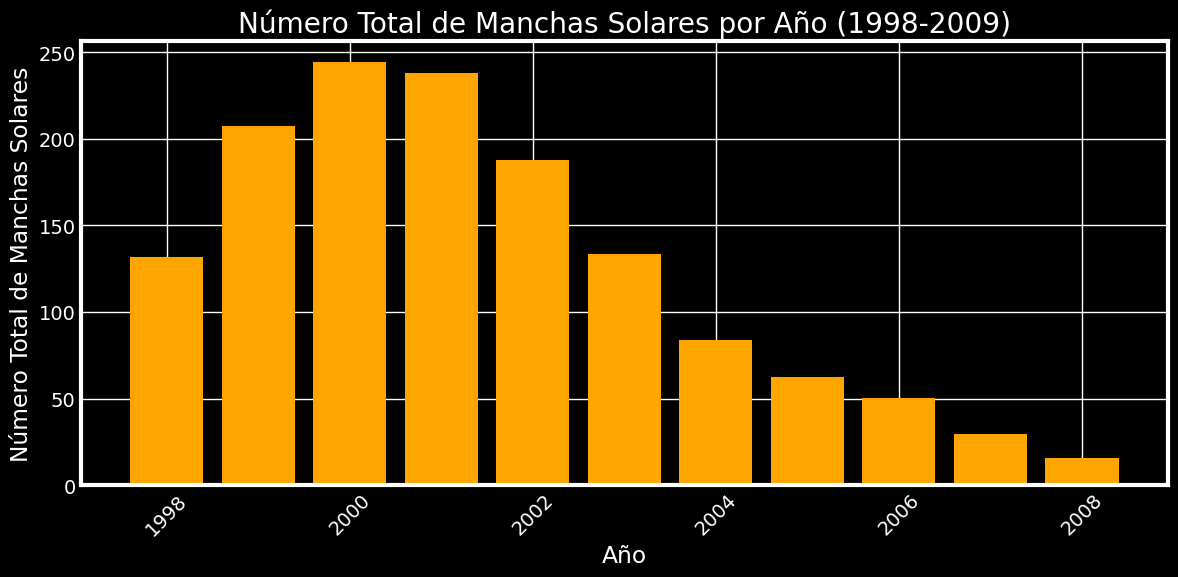

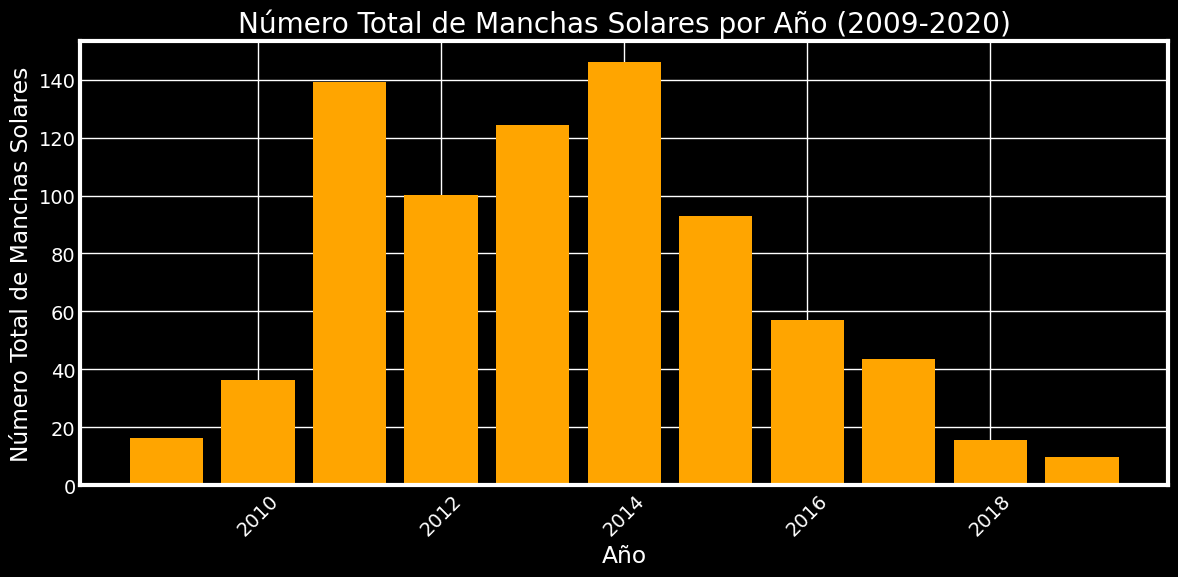

In [ ]:
# Creamos grupos de 11 años
data['Date'] = pd.to_datetime(data.index)  # Asegúrate de que 'Date' esté en formato datetime
data['Year'] = data['Date'].dt.year
data['Group'] = (data['Year'] // 11) * 11

# Calculamos el total de manchas solares en cada grupo
grouped_data = data.groupby('Group')['Monthly Mean Total Sunspot Number'].sum()

# Creamos grupos para los ciclos específicos de Schwabe
cycles = [(1965, 1976),(1976, 1987), (1987, 1998), (1998, 2009), (2009, 2020)]

# Iteramos sobre los ciclos y creamos gráficos de barras separados
for cycle_start, cycle_end in cycles:
    cycle_data = data[(data['Year'] >= cycle_start) & (data['Year'] < cycle_end)]

    plt.figure(figsize=(12, 6))
    plt.bar(cycle_data['Year'], cycle_data['Monthly Mean Total Sunspot Number'], color='orange')
    plt.xlabel('Año')
    plt.ylabel('Número Total de Manchas Solares')
    plt.title(f'Número Total de Manchas Solares por Año ({cycle_start}-{cycle_end})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###**Preprocesamiento de datos**<a name="ProsD"></a>

###**Diseño del modelo**<a name="DModel"></a>

###**Entrenamiento del modelo**<a name="EntD"></a>

###**Valiadación y ajuste**<a name="ValAj"></a>

###**Predicciones y Visualización**<a name="PredV"></a>

---

##**Análisis y conlusiones** <a name="Conclu"></a>

---

##**Referencias** <a name="Ref"></a>

---